To pinpoint specific geographic locations and temporal patterns where accidents occur most frequently, enabling targeted measures to enhance road safety.

# Import data

In [1]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("Accident Hotspots Analysis") \
    .getOrCreate()

df = spark.read.csv('Road.csv', header=True, inferSchema=True)

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/12/10 23:19:50 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
23/12/10 23:19:51 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


In [2]:
df.columns

['Time',
 'Day_of_week',
 'Age_band_of_driver',
 'Sex_of_driver',
 'Educational_level',
 'Vehicle_driver_relation',
 'Driving_experience',
 'Type_of_vehicle',
 'Owner_of_vehicle',
 'Service_year_of_vehicle',
 'Defect_of_vehicle',
 'Area_accident_occured',
 'Lanes_or_Medians',
 'Road_allignment',
 'Types_of_Junction',
 'Road_surface_type',
 'Road_surface_conditions',
 'Light_conditions',
 'Weather_conditions',
 'Type_of_collision',
 'Number_of_vehicles_involved',
 'Number_of_casualties',
 'Vehicle_movement',
 'Casualty_class',
 'Sex_of_casualty',
 'Age_band_of_casualty',
 'Casualty_severity',
 'Work_of_casuality',
 'Fitness_of_casuality',
 'Pedestrian_movement',
 'Cause_of_accident',
 'Accident_severity']

In [3]:
df.count()

12316

# Correlation Analysis - Categorical Data

## Sex_of_driver vs Accident_severity (Not statistically Significant)
If a correlation is found, it might suggest that certain driver demographics are more prone to be involved in severe accidents in specific areas. This can lead to targeted safety programs or interventions focused on these demographics.

In [57]:
from pyspark.sql import functions as F

# Assuming 'df' is your PySpark DataFrame and 'Sex_of_driver' is the column of interest
df_filter = df.filter(df['Sex_of_driver'].isNotNull() & (df['Sex_of_driver'] != 'unknown') & (df['Sex_of_driver'] != 'Unknown'))
df_filter = df_filter.filter(df_filter['Accident_severity'].isNotNull() & (df_filter['Accident_severity'] != 'unknown') & (df_filter['Accident_severity'] != 'Unknown'))

In [20]:
from pyspark.sql import SparkSession
from scipy.stats import chi2_contingency
import pandas as pd

# Initialize Spark Session
spark = SparkSession.builder.appName("ChiSquareTest").getOrCreate()

# Assuming df is your PySpark DataFrame
# Create the contingency table
contingency_table = df.groupBy('Sex_of_driver', 'Accident_severity').count()

# Convert to Pandas DataFrame for chi-square test
contingency_pd = contingency_table.toPandas()
contingency_pd_pivot = contingency_pd.pivot(index='Sex_of_driver', columns='Accident_severity', values='count').fillna(0)

# Perform the Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_pd_pivot)

# Output the results
print(chi2, p, dof, expected)

5.456303976472082 0.24359717919636242 4 [[8.99301721e+00 9.92077785e+01 5.92799204e+02]
 [1.46723449e+02 1.61860109e+03 9.67167546e+03]
 [2.28353361e+00 2.51911335e+01 1.50525333e+02]]


## Educational_level vs Accident_severity (>P, Weak Association)
Correlation here could indicate the need for educational campaigns or driver safety programs tailored to different education levels, potentially reducing accident severity in specific regions.

In [21]:
from pyspark.sql import functions as F

# Assuming 'df' is your PySpark DataFrame and 'Sex_of_driver' is the column of interest
df_filter = df.filter(df['Educational_level'].isNotNull() & (df['Educational_level'] != 'unknown') & (df['Educational_level'] != 'Unknown'))
df_filter = df_filter.filter(df_filter['Accident_severity'].isNotNull() & (df_filter['Accident_severity'] != 'unknown') & (df_filter['Accident_severity'] != 'Unknown'))

In [22]:
from pyspark.sql import SparkSession
from scipy.stats import chi2_contingency
import pandas as pd

# Initialize Spark Session
spark = SparkSession.builder.appName("ChiSquareTest").getOrCreate()

# Assuming df is your PySpark DataFrame
# Create the contingency table
contingency_table = df.groupBy('Educational_level', 'Accident_severity').count()

# Convert to Pandas DataFrame for chi-square test
contingency_pd = contingency_table.toPandas()
contingency_pd_pivot = contingency_pd.pivot(index='Educational_level', columns='Accident_severity', values='count').fillna(0)

# Perform the Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_pd_pivot)

# Output the results
print(chi2, p, dof, expected)

9.426626697689722 0.8027889222595036 14 [[9.50617083e+00 1.04868707e+02 6.26625122e+02]
 [4.64404027e+00 5.12314063e+01 3.06124553e+02]
 [2.77487821e+01 3.06114729e+02 1.82913649e+03]
 [1.42400130e+01 1.57090776e+02 9.38669211e+02]
 [5.77297824e-01 6.36854498e+00 3.80541572e+01]
 [9.77429360e+01 1.07826543e+03 6.44299164e+03]
 [1.28288405e+00 1.41523222e+01 8.45647938e+01]
 [2.25787593e+00 2.49080870e+01 1.48834037e+02]]


## Day_of_week vs Type_of_collision (<P, but not related to accident frequency or location)
Identifying days with higher frequencies of certain types of collisions can inform scheduling for increased road safety measures or traffic enforcement on those specific days.

In [25]:
from pyspark.sql import functions as F

# Assuming 'df' is your PySpark DataFrame and 'Sex_of_driver' is the column of interest
df_filter = df.filter(df['Day_of_week'].isNotNull() & (df['Day_of_week'] != 'unknown') & (df['Day_of_week'] != 'Unknown'))
df_filter = df_filter.filter(df_filter['Type_of_collision'].isNotNull() & (df_filter['Type_of_collision'] != 'Other'))

In [24]:
from pyspark.sql import SparkSession
from scipy.stats import chi2_contingency
import pandas as pd

# Initialize Spark Session
spark = SparkSession.builder.appName("ChiSquareTest").getOrCreate()

# Assuming df is your PySpark DataFrame
# Create the contingency table
contingency_table = df.groupBy('Day_of_week', 'Type_of_collision').count()

# Convert to Pandas DataFrame for chi-square test
contingency_pd = contingency_table.toPandas()
contingency_pd_pivot = contingency_pd.pivot(index='Day_of_week', columns='Type_of_collision', values='count').fillna(0)

# Perform the Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_pd_pivot)

# Output the results
print(chi2, p, dof, expected)

76.54952957973182 0.0734909654045788 60 [[2.56865054e+01 2.83380156e+01 1.48484573e+02 2.95974829e+02
  8.94884703e+00 5.63445924e+00 4.30870412e+00 6.57905976e+01
  2.32007145e+00 1.45402192e+03 1.49147450e+00]
 [2.11558136e+01 2.33396395e+01 1.22294251e+02 2.43769568e+02
  7.37041247e+00 4.64063007e+00 3.54871712e+00 5.41861806e+01
  1.91084768e+00 1.19755554e+03 1.22840208e+00]
 [2.09670348e+01 2.31313738e+01 1.21202988e+02 2.41594349e+02
  7.30464437e+00 4.59922053e+00 3.51705099e+00 5.37026632e+01
  1.89379669e+00 1.18686944e+03 1.21744073e+00]
 [1.84625690e+01 2.03683826e+01 1.06725560e+02 2.12736440e+02
  6.43212082e+00 4.04985385e+00 3.09694706e+00 4.72879994e+01
  1.66758688e+00 1.04510052e+03 1.07202014e+00]
 [2.32953069e+01 2.56999838e+01 1.34661903e+02 2.68422053e+02
  8.11578435e+00 5.10993829e+00 3.90759987e+00 5.96660442e+01
  2.10409224e+00 1.31866466e+03 1.35263072e+00]
 [2.22759013e+01 2.45753491e+01 1.28769081e+02 2.56675869e+02
  7.76063657e+00 4.88632673e+00 3.7366

## *Weather_conditions vs Accident_severity*
This correlation can help in predicting accident severity based on weather conditions. It can guide the deployment of weather-specific road safety measures in areas prone to severe weather-related accidents.

In [26]:
from pyspark.sql import functions as F

# Assuming 'df' is your PySpark DataFrame and 'Sex_of_driver' is the column of interest
df_filter = df.filter(df['Weather_conditions'].isNotNull() & (df['Weather_conditions'] != 'Other') & (df['Weather_conditions'] != 'Unknown'))
df_filter = df_filter.filter(df_filter['Accident_severity'].isNotNull() & (df_filter['Accident_severity'] != 'unknown') & (df_filter['Accident_severity'] != 'Unknown'))

In [27]:
from pyspark.sql import SparkSession
from scipy.stats import chi2_contingency
import pandas as pd

# Initialize Spark Session
spark = SparkSession.builder.appName("ChiSquareTest").getOrCreate()

# Assuming df is your PySpark DataFrame
# Create the contingency table
contingency_table = df.groupBy('Weather_conditions', 'Accident_severity').count()

# Convert to Pandas DataFrame for chi-square test
contingency_pd = contingency_table.toPandas()
contingency_pd_pivot = contingency_pd.pivot(index='Weather_conditions', columns='Accident_severity', values='count').fillna(0)

# Perform the Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_pd_pivot)

# Output the results
print(chi2, p, dof, expected)

41.751989160057434 0.00042962619787108736 16 [[1.60360507e+00 1.76904027e+01 1.05705992e+02]
 [1.28288405e-01 1.41523222e+00 8.45647938e+00]
 [1.29096622e+02 1.42414818e+03 8.50975520e+03]
 [3.79733680e+00 4.18908737e+01 2.50311790e+02]
 [1.70751867e+01 1.88367408e+02 1.12555741e+03]
 [5.13153621e-01 5.66092887e+00 3.38259175e+01]
 [7.82559272e-01 8.63291653e+00 5.15845242e+01]
 [3.74602144e+00 4.13247808e+01 2.46929198e+02]
 [1.25722637e+00 1.38692757e+01 8.28734979e+01]]


## *Light_conditions vs Accident_severity*
Understanding how light conditions affect accident severity can inform infrastructure improvements (like street lighting) in specific areas, and help in scheduling increased patrolling during high-risk light conditions.

In [28]:
from pyspark.sql import functions as F

# Assuming 'df' is your PySpark DataFrame and 'Sex_of_driver' is the column of interest
df_filter = df
df_filter = df_filter.filter(df_filter['Accident_severity'].isNotNull() & (df_filter['Accident_severity'] != 'unknown') & (df_filter['Accident_severity'] != 'Unknown'))

In [29]:
from pyspark.sql import SparkSession
from scipy.stats import chi2_contingency
import pandas as pd

# Initialize Spark Session
spark = SparkSession.builder.appName("ChiSquareTest").getOrCreate()

# Assuming df is your PySpark DataFrame
# Create the contingency table
contingency_table = df.groupBy('Light_conditions', 'Accident_severity').count()

# Convert to Pandas DataFrame for chi-square test
contingency_pd = contingency_table.toPandas()
contingency_pd_pivot = contingency_pd.pivot(index='Light_conditions', columns='Accident_severity', values='count').fillna(0)

# Perform the Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_pd_pivot)

# Output the results
print(chi2, p, dof, expected)

45.02454165025013 4.6279540659702016e-08 6 [[4.21555700e+01 4.65045307e+02 2.77879912e+03]
 [5.13153621e-01 5.66092887e+00 3.38259175e+01]
 [2.46313738e+00 2.71724586e+01 1.62364404e+02]
 [1.12868139e+02 1.24512131e+03 7.44001056e+03]]


## *Road_surface_conditions vs Accident_severity*
Knowing how road conditions influence accident severity can guide maintenance and infrastructure development in specific geographic locations to improve road safety.

In [30]:
from pyspark.sql import functions as F

# Assuming 'df' is your PySpark DataFrame and 'Sex_of_driver' is the column of interest
df_filter = df
df_filter = df_filter.filter(df_filter['Accident_severity'].isNotNull() & (df_filter['Accident_severity'] != 'unknown') & (df_filter['Accident_severity'] != 'Unknown'))

In [31]:
from pyspark.sql import SparkSession
from scipy.stats import chi2_contingency
import pandas as pd

# Initialize Spark Session
spark = SparkSession.builder.appName("ChiSquareTest").getOrCreate()

# Assuming df is your PySpark DataFrame
# Create the contingency table
contingency_table = df.groupBy('Road_surface_conditions', 'Accident_severity').count()

# Convert to Pandas DataFrame for chi-square test
contingency_pd = contingency_table.toPandas()
contingency_pd_pivot = contingency_pd.pivot(index='Road_surface_conditions', columns='Accident_severity', values='count').fillna(0)

# Perform the Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_pd_pivot)

# Output the results
print(chi2, p, dof, expected)

5.720857760632065 0.4551747454425168 6 [[1.19821371e+02 1.32182689e+03 7.89835174e+03]
 [2.56576811e-02 2.83046444e-01 1.69129588e+00]
 [8.98018837e-01 9.90662553e+00 5.91953556e+01]
 [3.72549529e+01 4.10983436e+02 2.45576161e+03]]


## *Type_of_vehicle vs Accident_severity*
This correlation can inform targeted vehicle safety standards or advisories for certain vehicle types, especially in areas where these vehicles are involved in more severe accidents.

In [74]:
from pyspark.sql import functions as F
import pandas as pd

# Assuming 'df' is your PySpark DataFrame and 'Sex_of_driver' is the column of interest
df_filter = df.filter(df['Type_of_vehicle'].isNotNull() & (df['Type_of_vehicle'] != 'Other') & (df['Type_of_vehicle'] != 'Bajaj'))
# Assuming df_filter is your PySpark DataFrame
df_filter = df_filter.withColumn("Type_of_vehicle", F.regexp_replace(F.col("Type_of_vehicle"), r"\s\(.*\)", ""))

df_filter = df_filter.filter(df_filter['Accident_severity'].isNotNull() & (df_filter['Accident_severity'] != 'unknown') & (df_filter['Accident_severity'] != 'Unknown'))

In [35]:
from pyspark.sql import SparkSession
from scipy.stats import chi2_contingency
import pandas as pd

# Initialize Spark Session
spark = SparkSession.builder.appName("ChiSquareTest").getOrCreate()

# Assuming df is your PySpark DataFrame
# Create the contingency table
contingency_table = df.groupBy('Type_of_vehicle', 'Accident_severity').count()

# Convert to Pandas DataFrame for chi-square test
contingency_pd = contingency_table.toPandas()
contingency_pd_pivot = contingency_pd.pivot(index='Type_of_vehicle', columns='Accident_severity', values='count').fillna(0)

# Perform the Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_pd_pivot)

# Output the results
print(chi2, p, dof, expected)

46.92659367688702 0.06909268737349043 34 [[1.21873985e+01 1.34447061e+02 8.03365541e+02]
 [4.11164339e+01 4.53581926e+02 2.71030164e+03]
 [3.72036375e-01 4.10417343e+00 2.45237902e+01]
 [2.69405651e-01 2.97198766e+00 1.77586067e+01]
 [4.91344592e+00 5.42033940e+01 3.23883160e+02]
 [6.94040273e+00 7.65640630e+01 4.57495534e+02]
 [2.80438454e+01 3.09369763e+02 1.84858639e+03]
 [2.27070477e+00 2.50496103e+01 1.49679685e+02]
 [1.54972394e+01 1.70960052e+02 1.02154271e+03]
 [1.04041897e+01 1.14775333e+02 6.85820477e+02]
 [9.12130562e+00 1.00623011e+02 6.01255684e+02]
 [6.82494316e+00 7.52903540e+01 4.49884703e+02]
 [5.18285158e+00 5.71753816e+01 3.41641767e+02]
 [9.74991880e-01 1.07557649e+01 6.42692433e+01]
 [1.07762260e+00 1.18879506e+01 7.10344268e+01]
 [8.81341345e+00 9.72264534e+01 5.80960133e+02]
 [3.39964274e+00 3.75036538e+01 2.24096703e+02]
 [5.90126665e-01 6.51006820e+00 3.88998051e+01]]


## *Area_accident_occurred vs Accident_severity*
Identifying areas prone to severe accidents is directly related to your goal. This information can be used to focus road safety improvements, traffic regulation changes, or public awareness campaigns in these specific locations.

In [37]:
from pyspark.sql import functions as F

# Assuming 'df' is your PySpark DataFrame and 'Sex_of_driver' is the column of interest
df_filter = df.filter(df['Area_accident_occured'].isNotNull() & (df['Area_accident_occured'] != 'Other') & (df['Area_accident_occured'] != 'Unknown') & (df['Area_accident_occured'] != 'Rural village areasOffice areas'))
df_filter = df_filter.filter(df_filter['Accident_severity'].isNotNull() & (df_filter['Accident_severity'] != 'unknown') & (df_filter['Accident_severity'] != 'Unknown'))

In [38]:
from pyspark.sql import SparkSession
from scipy.stats import chi2_contingency
import pandas as pd

# Initialize Spark Session
spark = SparkSession.builder.appName("ChiSquareTest").getOrCreate()

# Assuming df is your PySpark DataFrame
# Create the contingency table
contingency_table = df.groupBy('Area_accident_occured', 'Accident_severity').count()

# Convert to Pandas DataFrame for chi-square test
contingency_pd = contingency_table.toPandas()
contingency_pd_pivot = contingency_pd.pivot(index='Area_accident_occured', columns='Accident_severity', values='count').fillna(0)

# Perform the Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_pd_pivot)

# Output the results
print(chi2, p, dof, expected)

56.84743748191293 0.001012804988970795 28 [[3.06609289e+00 3.38240500e+01 2.02109857e+02]
 [8.08216954e-01 8.91596297e+00 5.32758201e+01]
 [4.19503085e+00 4.62780935e+01 2.76526876e+02]
 [1.35985710e+01 1.50014615e+02 8.96386814e+02]
 [1.55228970e+00 1.71243098e+01 1.02323400e+02]
 [5.84995128e+00 6.45345892e+01 3.85615460e+02]
 [2.79668724e+00 3.08520624e+01 1.84351250e+02]
 [4.42723287e+01 4.88396639e+02 2.91833103e+03]
 [4.89933420e+01 5.40477184e+02 3.22952947e+03]
 [1.28288405e-02 1.41523222e-01 8.45647938e-01]
 [2.64274115e+01 2.91537837e+02 1.74203475e+03]
 [5.64468983e-01 6.22702176e+00 3.72085093e+01]
 [2.56576811e-01 2.83046444e+00 1.69129588e+01]
 [5.32396882e+00 5.87321371e+01 3.50943894e+02]
 [2.82234492e-01 3.11351088e+00 1.86042546e+01]]


# Correlation Analysis - Visual Analysis

## Heatmap for Temporal Pattern
heatmaps for time-related data like 

*'Day_of_week' vs 'accident frequency'*

*'Hour'vs 'accident frequency'*

time of an accident is a significant factor and should definitely be included in the model

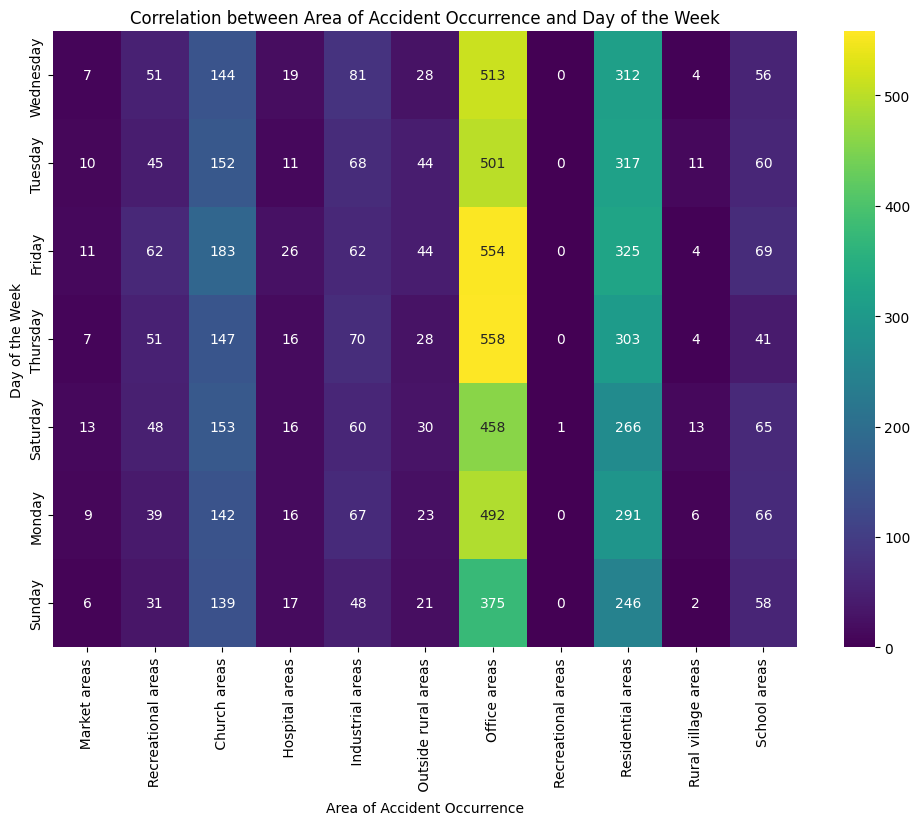

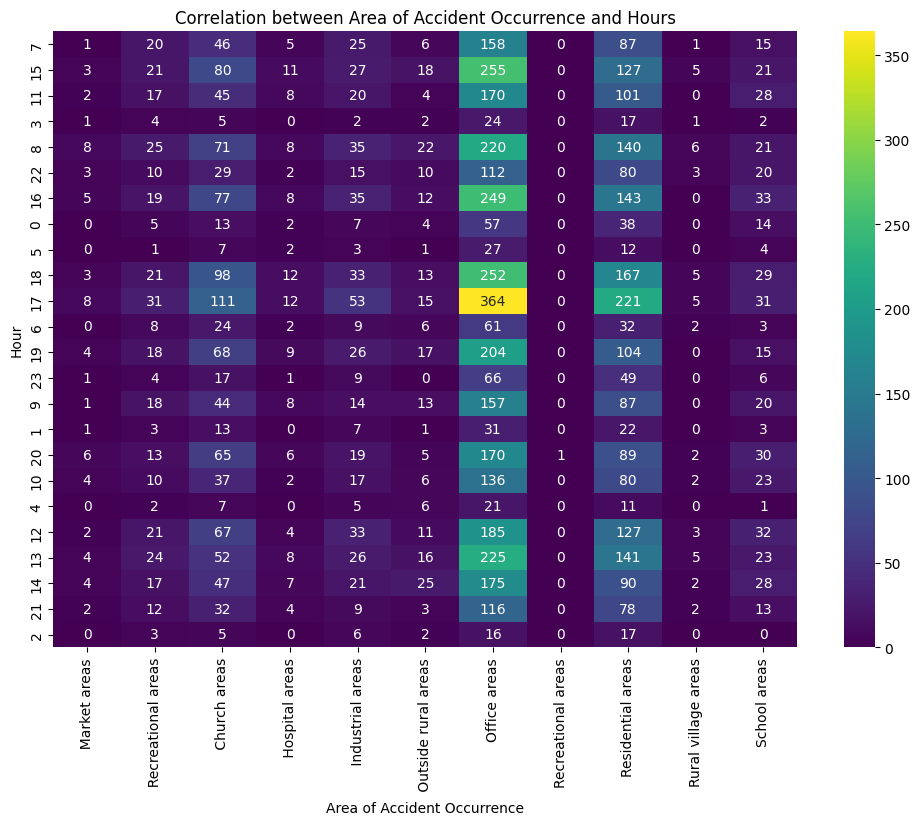

In [56]:
import pandas as pd
from pyspark.sql.functions import hour, minute
import matplotlib.pyplot as plt
import seaborn as sns

df = df.withColumn('Hour', hour(df['Time']))
df = df.withColumn('Minute', minute(df['Time']))

df_filter = df.filter(df['Day_of_week'].isNotNull())
df_filter = df_filter.filter(df_filter['Hour'].isNotNull())
df_filter = df_filter.filter(df_filter['Accident_severity'].isNotNull() & (df_filter['Accident_severity'] != 'unknown') & (df_filter['Accident_severity'] != 'Unknown'))

# Get distinct values for 'Day_of_week' and 'Area_accident_occured'
day_of_week_unique = df_filter.select('Day_of_week').distinct()
area_accident_occured_unique = df_filter.select('Area_accident_occured').distinct()

# Creating a crosstab (contingency table) in PySpark
contingency_table_df = df_filter.crosstab('Day_of_week', 'Area_accident_occured')

# Convert the PySpark DataFrame to Pandas DataFrame for plotting
contingency_table_pd = contingency_table_df.toPandas()

# Set an appropriate index for the heatmap
contingency_table_pd = contingency_table_pd.set_index('Day_of_week_Area_accident_occured')

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(contingency_table_pd, annot=True, fmt='d', cmap='viridis')
plt.title('Correlation between Area of Accident Occurrence and Day of the Week')
plt.ylabel('Day of the Week')
plt.xlabel('Area of Accident Occurrence')
plt.show()

# Get distinct values for 'Day_of_week' and 'Area_accident_occured'
Hour_unique = df_filter.select('Hour').distinct()
area_accident_occured_unique = df_filter.select('Area_accident_occured').distinct()

# Creating a crosstab (contingency table) in PySpark
contingency_table_df = df_filter.crosstab('Hour', 'Area_accident_occured')

# Convert the PySpark DataFrame to Pandas DataFrame for plotting
contingency_table_pd = contingency_table_df.toPandas()

# Set an appropriate index for the heatmap
contingency_table_pd = contingency_table_pd.set_index('Hour_Area_accident_occured')

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(contingency_table_pd, annot=True, fmt='d', cmap='viridis')
plt.title('Correlation between Area of Accident Occurrence and Hours')
plt.ylabel('Hour')
plt.xlabel('Area of Accident Occurrence')
plt.show()


## Bar Charts for Categorical Data Analysis

*'Weather_conditions' vs 'count of accidents'*: even if accidents are less frequent in adverse weather conditions, they might still be more severe, so this feature should be included in the model

*'Road_surface_conditions' vs 'count of accidents'*:  the severity and the risk of accidents might increase with adverse road conditions

*'Light_conditions' vs 'count of accidents'*: show a strong correlation with the number of accidents

*'Type_of_vehicle' vs 'count of accidents'*: This feature can help in understanding if certain vehicle types are more prone to accidents.

In [62]:
from pyspark.sql import functions as F

# Assuming 'df' is your PySpark DataFrame and 'Sex_of_driver' is the column of interest
df_filter = df.filter(df['Weather_conditions'].isNotNull() & (df['Weather_conditions'] != 'Other') & (df['Weather_conditions'] != 'Unknown'))
df_filter = df_filter.filter(df_filter['Road_surface_conditions'].isNotNull())
df_filter = df_filter.filter(df_filter['Light_conditions'].isNotNull())
df_filter = df_filter.filter(df_filter['Type_of_vehicle'].isNotNull() & (df['Type_of_vehicle'] != 'Other') & (df['Type_of_vehicle'] != 'Bajaj'))
df_filter = df_filter.withColumn("Type_of_vehicle", F.regexp_replace(F.col("Type_of_vehicle"), r"\s\(.*\)", ""))

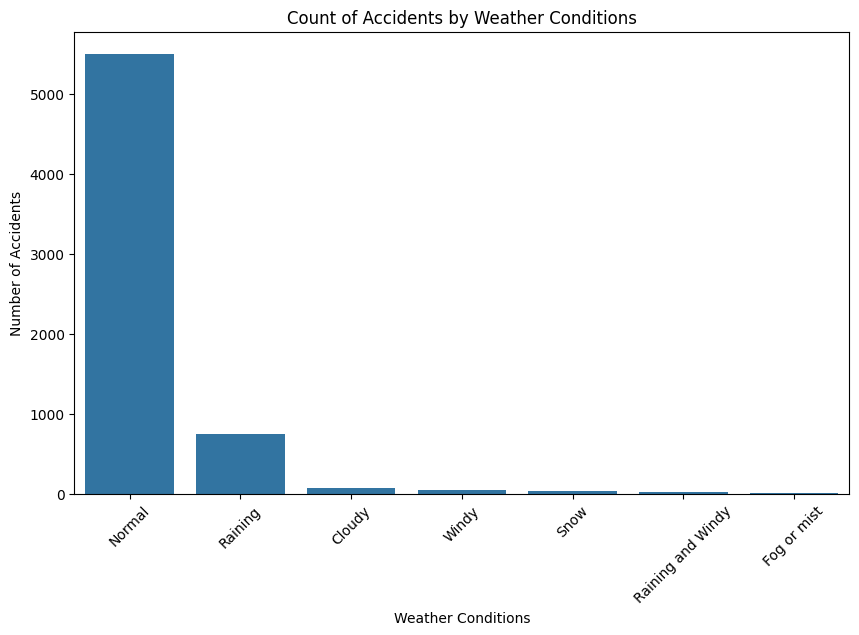

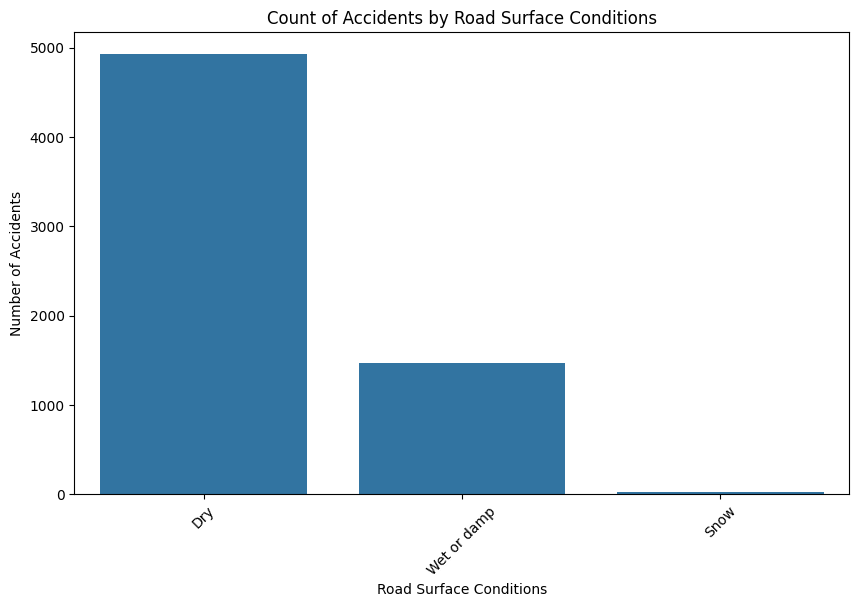

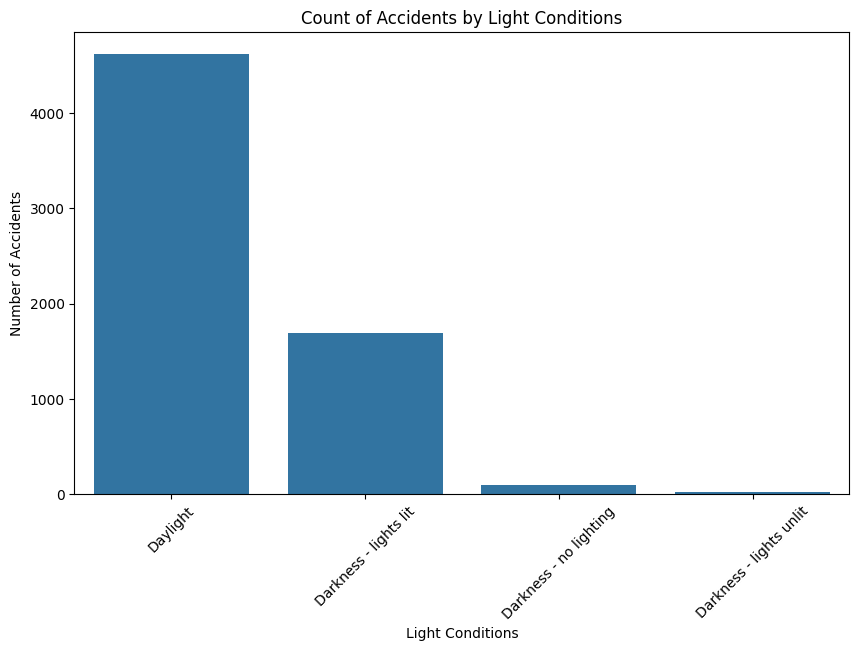

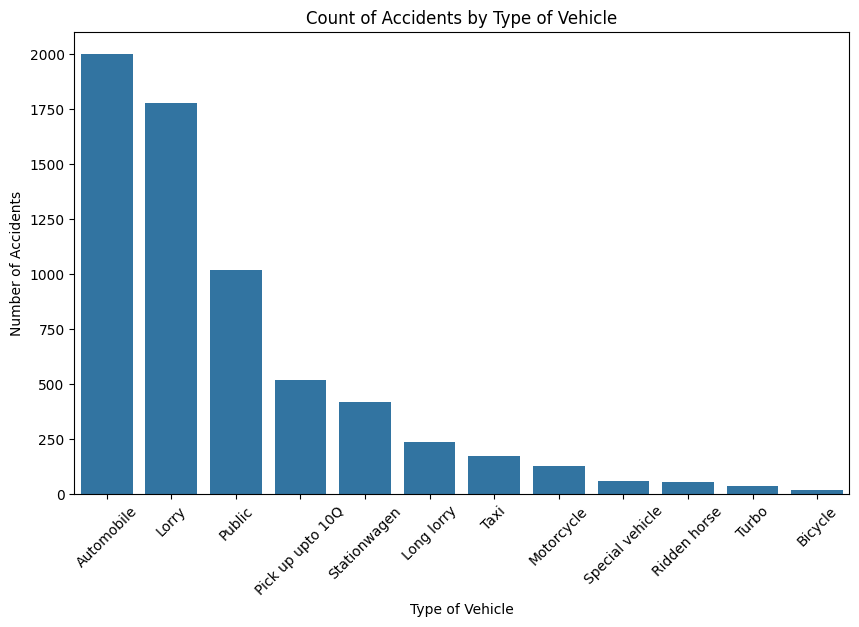

In [63]:
from pyspark.sql import functions as F
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_filter is your PySpark DataFrame
# Group by 'Weather_conditions' and count
accident_counts = df_filter.groupBy('Weather_conditions').count()

# Convert to Pandas DataFrame for plotting
accident_counts_pd = accident_counts.toPandas()

# Sort the DataFrame for better visualization
accident_counts_pd = accident_counts_pd.sort_values(by='count', ascending=False)

# Creating the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Weather_conditions', y='count', data=accident_counts_pd)

# Adding title and labels
plt.title('Count of Accidents by Weather Conditions')
plt.xlabel('Weather Conditions')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)  # Rotating the x labels for better readability

# Display the plot
plt.show()

# Group by 'Road_surface_conditions' and count
road_surface_counts = df_filter.groupBy('Road_surface_conditions').count()

# Convert to Pandas DataFrame for plotting
road_surface_counts_pd = road_surface_counts.toPandas().sort_values(by='count', ascending=False)

# Creating the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Road_surface_conditions', y='count', data=road_surface_counts_pd)
plt.title('Count of Accidents by Road Surface Conditions')
plt.xlabel('Road Surface Conditions')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()


# Group by 'Light_conditions' and count
light_conditions_counts = df_filter.groupBy('Light_conditions').count()

# Convert to Pandas DataFrame for plotting
light_conditions_counts_pd = light_conditions_counts.toPandas().sort_values(by='count', ascending=False)

# Creating the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Light_conditions', y='count', data=light_conditions_counts_pd)
plt.title('Count of Accidents by Light Conditions')
plt.xlabel('Light Conditions')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()


# Group by 'Type_of_vehicle' and count
type_of_vehicle_counts = df_filter.groupBy('Type_of_vehicle').count()

# Convert to Pandas DataFrame for plotting
type_of_vehicle_counts_pd = type_of_vehicle_counts.toPandas().sort_values(by='count', ascending=False)

# Creating the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Type_of_vehicle', y='count', data=type_of_vehicle_counts_pd)
plt.title('Count of Accidents by Type of Vehicle')
plt.xlabel('Type of Vehicle')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

## Time Series Analysis

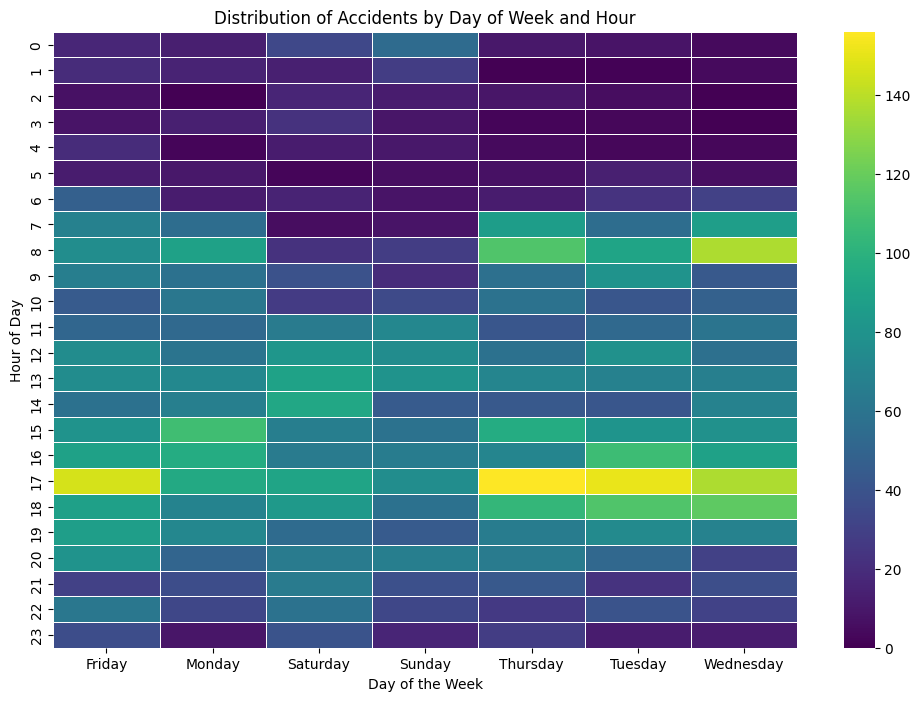

In [65]:
from pyspark.sql.functions import hour
import matplotlib.pyplot as plt
import seaborn as sns

df_filter = df.withColumn('Hour', hour(df['Time']))
df_filter = df_filter.filter(df['Hour'].isNotNull())
df_filter = df_filter.filter(df['Day_of_week'].isNotNull())

# Group the data by 'Day_of_week' and 'Hour' and count the number of accidents
accidents_by_day_hour = df_filter.groupBy('Day_of_week', 'Hour').count()

# Convert to Pandas DataFrame for plotting
accidents_by_day_hour_pd = accidents_by_day_hour.toPandas()

# Pivot the data for better visualization
accidents_pivot = accidents_by_day_hour_pd.pivot(index='Hour', columns='Day_of_week', values='count').fillna(0)

# Plotting the data
plt.figure(figsize=(12, 8))
sns.heatmap(accidents_pivot, annot=False, fmt=".0f", linewidths=.5, cmap='viridis')
plt.title('Distribution of Accidents by Day of Week and Hour')
plt.xlabel('Day of the Week')
plt.ylabel('Hour of Day')
plt.show()



# Avoiding Multicollinearity

# ML Model

## Read the data

In [74]:
from pyspark.sql import SparkSession

# Initialize Spark session
spark = SparkSession.builder \
    .appName("Accident Hotspots Analysis") \
    .getOrCreate()

# Load your DataFrame here
df = spark.read.csv('Road.csv', header=True, inferSchema=True)

df.show()
df.count()

+-------------------+-----------+------------------+-------------+------------------+-----------------------+------------------+--------------------+----------------+-----------------------+-----------------+---------------------+--------------------+--------------------+-----------------+-----------------+-----------------------+--------------------+------------------+--------------------+---------------------------+--------------------+----------------+---------------+---------------+--------------------+-----------------+-----------------+--------------------+--------------------+--------------------+-----------------+
|               Time|Day_of_week|Age_band_of_driver|Sex_of_driver| Educational_level|Vehicle_driver_relation|Driving_experience|     Type_of_vehicle|Owner_of_vehicle|Service_year_of_vehicle|Defect_of_vehicle|Area_accident_occured|    Lanes_or_Medians|     Road_allignment|Types_of_Junction|Road_surface_type|Road_surface_conditions|    Light_conditions|Weather_condition

12316

## Select Columns

In [75]:
selected_columns = ["Time", "Day_of_week", "Type_of_vehicle", "Area_accident_occured", "Road_surface_conditions", "Light_conditions", "Weather_conditions", "Accident_severity"]
df = df.select(selected_columns)
df.describe().show()
df.show()

+-------+-----------+---------------+---------------------+-----------------------+--------------------+------------------+-----------------+
|summary|Day_of_week|Type_of_vehicle|Area_accident_occured|Road_surface_conditions|    Light_conditions|Weather_conditions|Accident_severity|
+-------+-----------+---------------+---------------------+-----------------------+--------------------+------------------+-----------------+
|  count|      12316|          11366|                12077|                  12316|               12316|             12316|            12316|
|   mean|       NULL|           NULL|                 NULL|                   NULL|                NULL|              NULL|             NULL|
| stddev|       NULL|           NULL|                 NULL|                   NULL|                NULL|              NULL|             NULL|
|    min|     Friday|     Automobile|         Market areas|                    Dry|Darkness - lights...|            Cloudy|     Fatal injury|
|    m

## Drop the Missing Values

In [76]:
df = df.filter((df.Weather_conditions != "Unknown") & (df.Weather_conditions != "Other"))
df = df.filter(df.Light_conditions != "Unknown")
df = df.filter(df.Road_surface_conditions != "Unknown")
df = df.filter((df.Type_of_vehicle != "Other") & (df.Type_of_vehicle != "Bajaj"))
df = df.withColumn("Type_of_vehicle", F.regexp_replace(F.col("Type_of_vehicle"), r"\s\(.*\)", ""))
df = df.filter((df.Area_accident_occured != 'Other') & (df.Area_accident_occured != 'Unknown') & (df.Area_accident_occured != 'Rural village areasOffice areas') )

df.show()
df.count()

+-------------------+-----------+---------------+---------------------+-----------------------+--------------------+------------------+-----------------+
|               Time|Day_of_week|Type_of_vehicle|Area_accident_occured|Road_surface_conditions|    Light_conditions|Weather_conditions|Accident_severity|
+-------------------+-----------+---------------+---------------------+-----------------------+--------------------+------------------+-----------------+
|2023-12-11 17:02:00|     Monday|     Automobile|    Residential areas|                    Dry|            Daylight|            Normal|    Slight Injury|
|2023-12-11 17:02:00|     Monday|         Public|         Office areas|                    Dry|            Daylight|            Normal|    Slight Injury|
|2023-12-11 17:02:00|     Monday|          Lorry|   Recreational areas|                    Dry|            Daylight|            Normal|   Serious Injury|
|2023-12-11 01:06:00|     Sunday|         Public|         Office areas|     

6427

## Converting "Day" and "Time

In [77]:
from pyspark.sql.functions import udf
from pyspark.sql.types import IntegerType
from pyspark.sql.functions import hour

# Create a user-defined function for converting days to numbers
days_dict = {'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6, 'Sunday': 7}
convert_day_udf = udf(lambda day: days_dict.get(day, 0), IntegerType())

# Apply the UDF to the 'Day_of_week' column
df = df.withColumn('Day_of_week_numeric', convert_day_udf(df['Day_of_week']))
# Extract the hour from the 'Time' column
df = df.withColumn("Hour", hour("Time"))

# Check the transformation
df.select('Time', 'Hour').show()

# Check the transformation
df.select('Day_of_week', 'Day_of_week_numeric').show()

+-------------------+----+
|               Time|Hour|
+-------------------+----+
|2023-12-11 17:02:00|  17|
|2023-12-11 17:02:00|  17|
|2023-12-11 17:02:00|  17|
|2023-12-11 01:06:00|   1|
|2023-12-11 17:30:00|  17|
|2023-12-11 17:20:00|  17|
|2023-12-11 17:20:00|  17|
|2023-12-11 17:20:00|  17|
|2023-12-11 14:40:00|  14|
|2023-12-11 14:40:00|  14|
|2023-12-11 17:45:00|  17|
|2023-12-11 17:45:00|  17|
|2023-12-11 17:45:00|  17|
|2023-12-11 22:45:00|  22|
|2023-12-11 22:45:00|  22|
|2023-12-11 22:45:00|  22|
|2023-12-11 08:20:00|   8|
|2023-12-11 15:10:00|  15|
|2023-12-11 12:11:00|  12|
|2023-12-11 12:11:00|  12|
+-------------------+----+
only showing top 20 rows

+-----------+-------------------+
|Day_of_week|Day_of_week_numeric|
+-----------+-------------------+
|     Monday|                  1|
|     Monday|                  1|
|     Monday|                  1|
|     Sunday|                  7|
|  Wednesday|                  3|
|     Friday|                  5|
|     Friday|       

In [78]:
df.show()
df.count()

+-------------------+-----------+---------------+---------------------+-----------------------+--------------------+------------------+-----------------+-------------------+----+
|               Time|Day_of_week|Type_of_vehicle|Area_accident_occured|Road_surface_conditions|    Light_conditions|Weather_conditions|Accident_severity|Day_of_week_numeric|Hour|
+-------------------+-----------+---------------+---------------------+-----------------------+--------------------+------------------+-----------------+-------------------+----+
|2023-12-11 17:02:00|     Monday|     Automobile|    Residential areas|                    Dry|            Daylight|            Normal|    Slight Injury|                  1|  17|
|2023-12-11 17:02:00|     Monday|         Public|         Office areas|                    Dry|            Daylight|            Normal|    Slight Injury|                  1|  17|
|2023-12-11 17:02:00|     Monday|          Lorry|   Recreational areas|                    Dry|          

6427

### Get rid of the old ones

In [79]:
# Replace "Time" and "Day_of_week"
selected_columns = ["Hour", "Day_of_week_numeric", "Type_of_vehicle", "Area_accident_occured", "Road_surface_conditions", "Light_conditions", "Weather_conditions", "Accident_severity"]
df = df.select(selected_columns)
df.describe().show()
df.show()

+-------+-----------------+-------------------+---------------+---------------------+-----------------------+--------------------+------------------+-----------------+
|summary|             Hour|Day_of_week_numeric|Type_of_vehicle|Area_accident_occured|Road_surface_conditions|    Light_conditions|Weather_conditions|Accident_severity|
+-------+-----------------+-------------------+---------------+---------------------+-----------------------+--------------------+------------------+-----------------+
|  count|             6427|               6427|           6427|                 6427|                   6427|                6427|              6427|             6427|
|   mean|13.87396919246927|  3.930916446242415|           NULL|                 NULL|                   NULL|                NULL|              NULL|             NULL|
| stddev|5.186528718739665|  1.940097591651244|           NULL|                 NULL|                   NULL|                NULL|              NULL|           

### Converting strings into numerical format (using StringIndexer and OneHotEncoder).

In [80]:
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler

# Indexing all categorical columns
indexers = [StringIndexer(inputCol=column, outputCol=column+"_index").fit(df) for column in selected_columns]

# Encoding indexed columns
encoders = [OneHotEncoder(inputCol=indexer.getOutputCol(), outputCol=indexer.getOutputCol()+"_vec") for indexer in indexers]

# Assembling vector
assemblerInputs = [encoder.getOutputCol() for encoder in encoders]
assembler = VectorAssembler(inputCols=assemblerInputs, outputCol="features")

# Indexing the label column (the depandant variable "target")
labelIndexer = StringIndexer(inputCol='Accident_severity', outputCol='label').fit(df)

# Pipeline
from pyspark.ml import Pipeline
pipeline = Pipeline(stages=indexers + encoders + [assembler, labelIndexer])
pipelineModel = pipeline.fit(df)
df_transformed = pipelineModel.transform(df)


## Machine Learning Models

In [81]:
train, test = df_transformed.randomSplit([0.7, 0.3])
df.printSchema()

root
 |-- Hour: integer (nullable = true)
 |-- Day_of_week_numeric: integer (nullable = true)
 |-- Type_of_vehicle: string (nullable = true)
 |-- Area_accident_occured: string (nullable = true)
 |-- Road_surface_conditions: string (nullable = true)
 |-- Light_conditions: string (nullable = true)
 |-- Weather_conditions: string (nullable = true)
 |-- Accident_severity: string (nullable = true)



### Logistic Regression

In [82]:
from pyspark.ml.classification import LogisticRegression

lr = LogisticRegression(featuresCol='features', labelCol='label')

lrModel = lr.fit(train)

#### *Model Evaluation in Classification*

- **Accuracy**: The proportion of total correct predictions out of all predictions made.

- **Precision**: The proportion of true positive predictions out of all positive predictions made.

- **Recall**: The proportion of true positive predictions out of all actual positives.

- **F1 Score**: The harmonic mean of precision and recall, providing a balance between the two in cases where they may diverge.

- **Area** Under ROC Curve (AUC-ROC): A performance measurement for classification problems at various threshold settings. ROC is a probability curve and AUC represents the degree or measure of separability.

In [83]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Predict on the test set
predictions = lrModel.transform(test)

# Evaluate the model for accuracy
accuracy_evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")
accuracy = accuracy_evaluator.evaluate(predictions)
print("Accuracy = %g" % accuracy)

# Evaluate the model for precision
precision_evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="weightedPrecision")
precision = precision_evaluator.evaluate(predictions)
print("Precision = %g" % precision)

# Evaluate the model for recall
recall_evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="weightedRecall")
recall = recall_evaluator.evaluate(predictions)
print("Recall = %g" % recall)

# Evaluate the model for F1 score
f1_evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="f1")
f1 = f1_evaluator.evaluate(predictions)
print("F1 Score = %g" % f1)


Accuracy = 1
Precision = 1
Recall = 1
F1 Score = 1


#### Parameter Tuning and Cross-Validation

In [84]:
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder

# Expanded parameter grid
paramGrid = (ParamGridBuilder()
             .addGrid(lr.regParam, [0.1, 0.01, 0.001])
             .addGrid(lr.maxIter, [10, 20, 30])
             .addGrid(lr.elasticNetParam, [0.0, 0.5, 1.0])
             .build())

# Choose the evaluator based on your primary metric or create a composite score
evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="f1")  # example using F1

crossval = CrossValidator(estimator=lr,
                          estimatorParamMaps=paramGrid,
                          evaluator=evaluator,
                          numFolds=5)

# Run cross-validation, and choose the best set of parameters.
cvModel = crossval.fit(train)
bestModel = cvModel.bestModel

# Evaluate the best model
bestPredictions = bestModel.transform(test)
bestAccuracy = accuracy_evaluator.evaluate(bestPredictions)
bestPrecision = precision_evaluator.evaluate(bestPredictions)
bestRecall = recall_evaluator.evaluate(bestPredictions)
bestF1 = f1_evaluator.evaluate(bestPredictions)

print(f"Best Model's Accuracy: {bestAccuracy}")
print(f"Best Model's Precision: {bestPrecision}")
print(f"Best Model's Recall: {bestRecall}")
print(f"Best Model's F1 Score: {bestF1}")


Best Model's Accuracy: 1.0
Best Model's Precision: 1.0
Best Model's Recall: 1.0
Best Model's F1 Score: 1.0


#### Graph

/usr/local/lib/python3.11/site-packages/pyspark/sql/context.py:158: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


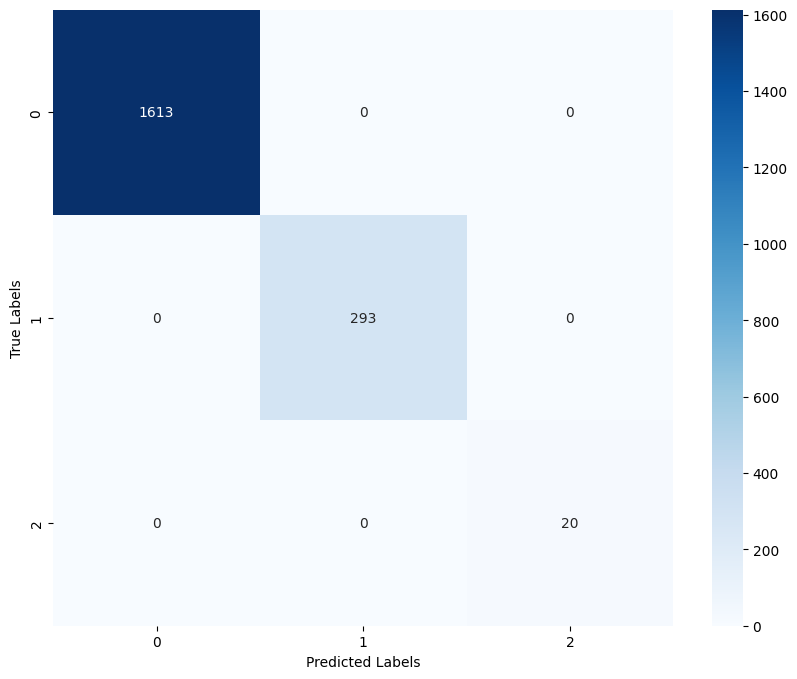

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.mllib.evaluation import MulticlassMetrics

# Convert prediction DataFrame to RDD
predictionAndLabels = predictions.select("prediction", "label").rdd.map(lambda x: (x[0], float(x[1])))

# Instantiate metrics object
metrics = MulticlassMetrics(predictionAndLabels)

# Confusion Matrix
confusion_matrix = metrics.confusionMatrix().toArray()

# Plotting using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix, annot=True, fmt="g", cmap="Blues")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

### Random Forest

========== OLD


+-------+-----------------+-------------------+---------------+---------------------+-----------------------+--------------------+------------------+-----------------+
|summary|             Hour|Day_of_week_numeric|Type_of_vehicle|Area_accident_occured|Road_surface_conditions|    Light_conditions|Weather_conditions|Accident_severity|
+-------+-----------------+-------------------+---------------+---------------------+-----------------------+--------------------+------------------+-----------------+
|  count|             6427|               6427|           6427|                 6427|                   6427|                6427|              6427|             6427|
|   mean|13.87396919246927|  3.930916446242415|           NULL|                 NULL|                   NULL|                NULL|              NULL|             NULL|
| stddev|5.186528718739665|  1.940097591651244|           NULL|                 NULL|                   NULL|                NULL|              NULL|           

## Encoding categorical variables

In [63]:
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler

# Indexing all categorical columns
# indexers = [StringIndexer(inputCol=column, outputCol=column+"_index").fit(df) for column in selected_columns[:-1]] # Exclude last column 'an interger'
selected_columns_filtered = [column for column in selected_columns]
indexers = [StringIndexer(inputCol=column, outputCol=column+"_index").fit(df) for column in selected_columns_filtered]

# Indexing the label column (the depandant variable "target")
labelIndexer = StringIndexer(inputCol='Accident_severity', outputCol='label').fit(df)

# Encoding indexed columns
encoders = [OneHotEncoder(inputCol=indexer.getOutputCol(), outputCol=indexer.getOutputCol()+"_vec") for indexer in indexers]

# Assembling vector
assemblerInputs = [encoder.getOutputCol() for encoder in encoders]
assembler = VectorAssembler(inputCols=assemblerInputs, outputCol="features")

# Pipeline
from pyspark.ml import Pipeline
pipeline = Pipeline(stages=indexers + encoders + [assembler, labelIndexer])
pipelineModel = pipeline.fit(df)
df_transformed = pipelineModel.transform(df)



### Encode "Day_of_week" 

In [6]:
from pyspark.sql.functions import udf
from pyspark.sql.types import IntegerType
from pyspark.sql.functions import hour


# Create a user-defined function for converting days to numbers
days_dict = {'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6, 'Sunday': 7}
convert_day_udf = udf(lambda day: days_dict.get(day, 0), IntegerType())

# Apply the UDF to the 'Day_of_week' column
df = df.withColumn('Day_of_week_numeric', convert_day_udf(df['Day_of_week']))
# Extract the hour from the 'Time' column
df = df.withColumn("Hour", hour("Time"))

# Check the transformation
df.select('Time', 'Hour').show()

# Check the transformation
df.select('Day_of_week', 'Day_of_week_numeric').show()

+-------------------+----+
|               Time|Hour|
+-------------------+----+
|2023-12-10 17:02:00|  17|
|2023-12-10 17:02:00|  17|
|2023-12-10 17:02:00|  17|
|2023-12-10 01:06:00|   1|
|2023-12-10 01:06:00|   1|
|2023-12-10 14:15:00|  14|
|2023-12-10 17:30:00|  17|
|2023-12-10 17:20:00|  17|
|2023-12-10 17:20:00|  17|
|2023-12-10 17:20:00|  17|
|2023-12-10 14:40:00|  14|
|2023-12-10 14:40:00|  14|
|2023-12-10 17:45:00|  17|
|2023-12-10 17:45:00|  17|
|2023-12-10 17:45:00|  17|
|2023-12-10 22:45:00|  22|
|2023-12-10 22:45:00|  22|
|2023-12-10 22:45:00|  22|
|2023-12-10 22:45:00|  22|
|2023-12-10 08:20:00|   8|
+-------------------+----+
only showing top 20 rows

+-----------+-------------------+
|Day_of_week|Day_of_week_numeric|
+-----------+-------------------+
|     Monday|                  1|
|     Monday|                  1|
|     Monday|                  1|
|     Sunday|                  7|
|     Sunday|                  7|
|     Friday|                  5|
|  Wednesday|       

## One-hot Encoding

### Encode "Weather_conditions"

In [7]:
from pyspark.ml.feature import StringIndexer, OneHotEncoder
from pyspark.sql.functions import monotonically_increasing_id

# Add an index column to the original DataFrame
df = df.withColumn("index", monotonically_increasing_id())

# Filter out rows with null or 'Unknown' values in 'Weather_conditions'
df_filtered = df.filter((df.Weather_conditions.isNotNull()) & (df.Weather_conditions != 'Unknown') & (df.Weather_conditions != 'Other'))

# StringIndexer to convert the 'Weather_conditions' column to numeric indices
stringIndexer = StringIndexer(inputCol="Weather_conditions", outputCol="Weather_conditions_Index")

# Fit the indexer to the data and transform it
indexed = stringIndexer.fit(df).transform(df_filtered)

# OneHotEncoder to convert indexed numbers to one-hot encoded values
encoder = OneHotEncoder(inputCols=["Weather_conditions_Index"], outputCols=["Weather_conditions_Encoded"])

# Fit and transform
encoded = encoder.fit(indexed).transform(indexed)

# Add the same index column to the encoded DataFrame
encoded = encoded.withColumn("index", monotonically_increasing_id())

# Join using the index
df = df.join(encoded.select("index", "Weather_conditions_Encoded"), on=["index"])

# Optionally, you can drop the index column after joining if it's no longer needed
df = df.drop("index")

df.show()

+-------------------+-----------+------------------+-------------+------------------+-----------------------+------------------+--------------------+----------------+-----------------------+-----------------+---------------------+--------------------+--------------------+-----------------+-----------------+-----------------------+--------------------+------------------+--------------------+---------------------------+--------------------+----------------+---------------+---------------+--------------------+-----------------+-----------------+--------------------+--------------------+--------------------+-----------------+-------------------+----+--------------------------+
|               Time|Day_of_week|Age_band_of_driver|Sex_of_driver| Educational_level|Vehicle_driver_relation|Driving_experience|     Type_of_vehicle|Owner_of_vehicle|Service_year_of_vehicle|Defect_of_vehicle|Area_accident_occured|    Lanes_or_Medians|     Road_allignment|Types_of_Junction|Road_surface_type|Road_surfa

### Encode "Light_conditions"

In [8]:
from pyspark.ml.feature import StringIndexer, OneHotEncoder
from pyspark.sql.functions import monotonically_increasing_id

# Add an index column to the original DataFrame
df = df.withColumn("index", monotonically_increasing_id())

# Filter out rows with null or 'Unknown' values in 'Weather_conditions'
df_filtered = df.filter((df.Light_conditions.isNotNull()) & (df.Light_conditions != 'Unknown'))

# StringIndexer to convert the 'Light_conditions' column to numeric indices
stringIndexer = StringIndexer(inputCol="Light_conditions", outputCol="Light_conditions_Index")

# Fit the indexer to the data and transform it
indexed = stringIndexer.fit(df).transform(df_filtered)

# OneHotEncoder to convert indexed numbers to one-hot encoded values
encoder = OneHotEncoder(inputCols=["Light_conditions_Index"], outputCols=["Light_conditions_Encoded"])

# Fit and transform
encoded = encoder.fit(indexed).transform(indexed)

# Add the same index column to the encoded DataFrame
encoded = encoded.withColumn("index", monotonically_increasing_id())

# Join using the index
df = df.join(encoded.select("index", "Light_conditions_Encoded"), on=["index"])

# Optionally, you can drop the index column after joining if it's no longer needed
df = df.drop("index")

df.show()

+-------------------+-----------+------------------+-------------+------------------+-----------------------+------------------+--------------------+----------------+-----------------------+-----------------+---------------------+--------------------+--------------------+-----------------+-----------------+-----------------------+--------------------+------------------+--------------------+---------------------------+--------------------+----------------+---------------+---------------+--------------------+-----------------+-----------------+--------------------+--------------------+--------------------+-----------------+-------------------+----+--------------------------+------------------------+
|               Time|Day_of_week|Age_band_of_driver|Sex_of_driver| Educational_level|Vehicle_driver_relation|Driving_experience|     Type_of_vehicle|Owner_of_vehicle|Service_year_of_vehicle|Defect_of_vehicle|Area_accident_occured|    Lanes_or_Medians|     Road_allignment|Types_of_Junction|Roa

### Encode "Road_surface_conditions"

In [9]:
from pyspark.ml.feature import StringIndexer, OneHotEncoder
from pyspark.sql.functions import monotonically_increasing_id

# Add an index column to the original DataFrame
df = df.withColumn("index", monotonically_increasing_id())

# Filter out rows with null or 'Unknown' values in 'Weather_conditions'
df_filtered = df.filter((df.Road_surface_conditions.isNotNull()) & (df.Road_surface_conditions != 'Unknown'))

# StringIndexer to convert the 'Light_conditions' column to numeric indices
stringIndexer = StringIndexer(inputCol="Road_surface_conditions", outputCol="Road_surface_conditions_Index")

# Fit the indexer to the data and transform it
indexed = stringIndexer.fit(df).transform(df_filtered)

# OneHotEncoder to convert indexed numbers to one-hot encoded values
encoder = OneHotEncoder(inputCols=["Road_surface_conditions_Index"], outputCols=["Road_surface_conditions_Encoded"])

# Fit and transform
encoded = encoder.fit(indexed).transform(indexed)

# Add the same index column to the encoded DataFrame
encoded = encoded.withColumn("index", monotonically_increasing_id())

# Join using the index
df = df.join(encoded.select("index", "Road_surface_conditions_Encoded"), on=["index"])

# Optionally, you can drop the index column after joining if it's no longer needed
df = df.drop("index")

df.show()

+-------------------+-----------+------------------+-------------+------------------+-----------------------+------------------+--------------------+----------------+-----------------------+-----------------+---------------------+--------------------+--------------------+-----------------+-----------------+-----------------------+--------------------+------------------+--------------------+---------------------------+--------------------+----------------+---------------+---------------+--------------------+-----------------+-----------------+--------------------+--------------------+--------------------+-----------------+-------------------+----+--------------------------+------------------------+-------------------------------+
|               Time|Day_of_week|Age_band_of_driver|Sex_of_driver| Educational_level|Vehicle_driver_relation|Driving_experience|     Type_of_vehicle|Owner_of_vehicle|Service_year_of_vehicle|Defect_of_vehicle|Area_accident_occured|    Lanes_or_Medians|     Road_

### Encode "Type_of_vehicle"

In [11]:
from pyspark.ml.feature import StringIndexer, OneHotEncoder
from pyspark.sql.functions import monotonically_increasing_id
from pyspark.sql import functions as F

df = df.drop("Type_of_vehicle_Encoded")

# Add an index column to the original DataFrame
df = df.withColumn("index", monotonically_increasing_id())

# Filter out unwanted rows and clean up Type_of_vehicle column
df = df.filter(df['Type_of_vehicle'].isNotNull() & (df['Type_of_vehicle'] != 'Other') & (df['Type_of_vehicle'] != 'Bajaj'))
df = df.withColumn("Type_of_vehicle", F.regexp_replace(F.col("Type_of_vehicle"), r"\s\(.*\)", ""))

# Apply StringIndexer with handleInvalid set to 'keep'
stringIndexer = StringIndexer(inputCol="Type_of_vehicle", outputCol="Type_of_vehicle_Index")
indexed = stringIndexer.fit(df).transform(df)

# Apply OneHotEncoder
encoder = OneHotEncoder(inputCols=["Type_of_vehicle_Index"], outputCols=["Type_of_vehicle_Encoded"])
encoded = encoder.fit(indexed).transform(indexed)

# Join using the index
df = df.join(encoded.select("index", "Type_of_vehicle_Encoded"), on=["index"])

# Optionally, you can drop the index column after joining if it's no longer needed
df = df.drop("index")

df.show()

+-------------------+-----------+------------------+-------------+------------------+-----------------------+------------------+----------------+----------------+-----------------------+-----------------+---------------------+--------------------+--------------------+-----------------+-----------------+-----------------------+--------------------+------------------+--------------------+---------------------------+--------------------+----------------+---------------+---------------+--------------------+-----------------+-----------------+--------------------+--------------------+--------------------+-----------------+-------------------+----+--------------------------+------------------------+-------------------------------+-----------------------+
|               Time|Day_of_week|Age_band_of_driver|Sex_of_driver| Educational_level|Vehicle_driver_relation|Driving_experience| Type_of_vehicle|Owner_of_vehicle|Service_year_of_vehicle|Defect_of_vehicle|Area_accident_occured|    Lanes_or_Me

### Encode "Area_accident_occured"

In [12]:
from pyspark.ml.feature import StringIndexer, OneHotEncoder
from pyspark.sql.functions import monotonically_increasing_id

df = df.drop("Area_accident_occured_Encoded")

# Add an index column to the original DataFrame
df = df.withColumn("index", monotonically_increasing_id())

# Filter out unwanted rows and clean up Type_of_vehicle column
df = df.filter(df['Area_accident_occured'].isNotNull() & (df['Area_accident_occured'] != 'Other') & (df['Area_accident_occured'] != 'Unknown') & (df['Area_accident_occured'] != 'Rural village areasOffice areas'))

# Apply StringIndexer with handleInvalid set to 'keep'
stringIndexer = StringIndexer(inputCol="Area_accident_occured", outputCol="Area_accident_occured_Index")
indexed = stringIndexer.fit(df).transform(df)

# Apply OneHotEncoder
encoder = OneHotEncoder(inputCols=["Area_accident_occured_Index"], outputCols=["Area_accident_occured_Encoded"])
encoded = encoder.fit(indexed).transform(indexed)

# Join using the index
df = df.join(encoded.select("index", "Area_accident_occured_Encoded"), on=["index"])

# Optionally, you can drop the index column after joining if it's no longer needed
df = df.drop("index")

df.show()

+-------------------+-----------+------------------+-------------+------------------+-----------------------+------------------+----------------+----------------+-----------------------+-----------------+---------------------+--------------------+--------------------+-----------------+-----------------+-----------------------+--------------------+------------------+--------------------+---------------------------+--------------------+----------------+---------------+---------------+--------------------+-----------------+-----------------+--------------------+--------------------+--------------------+-----------------+-------------------+----+--------------------------+------------------------+-------------------------------+-----------------------+-----------------------------+
|               Time|Day_of_week|Age_band_of_driver|Sex_of_driver| Educational_level|Vehicle_driver_relation|Driving_experience| Type_of_vehicle|Owner_of_vehicle|Service_year_of_vehicle|Defect_of_vehicle|Area_ac

### Encode "Accident_severity"

## Model

In [14]:
from pyspark.ml.feature import VectorAssembler, StringIndexer
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

if 'label' in df.columns:
    df = df.drop('label')

# Encode the label column if necessary
labelIndexer = StringIndexer(inputCol="Accident_severity", outputCol="label")
df = labelIndexer.fit(df).transform(df)

# Assemble the features
assembler = VectorAssembler(inputCols=[
    'Weather_conditions_Encoded', 'Light_conditions_Encoded', 'Road_surface_conditions_Encoded',
    'Type_of_vehicle_Encoded', 'Area_accident_occured_Encoded', 'Day_of_week_numeric', 'Hour'
], outputCol="features")
df_assembled = assembler.transform(df)


# Split the data into training and test sets
train, test = df_assembled.randomSplit([0.7, 0.3], seed=42)

# Create the RandomForestClassifier model
rf = RandomForestClassifier(featuresCol="features", labelCol="label", numTrees=20, maxDepth=10, maxBins=32, minInstancesPerNode=2, seed=42)

# Fit the model on the training data
model = rf.fit(train)

# Make predictions on the test data
predictions = model.transform(test)

# Evaluate the model
evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")

accuracy = evaluator.evaluate(predictions)
print("Test Accuracy = %g" % accuracy)

# Show some predictions
predictions.select("prediction", "label", "features").show()


Test Accuracy = 0.849495


+----------+-----+--------------------+
|prediction|label|            features|
+----------+-----+--------------------+
|       0.0|  0.0|(37,[0,9,11,22,26...|
|       0.0|  0.0|(37,[0,9,12,18,26...|
|       0.0|  0.0|(37,[0,9,12,15,25...|
|       0.0|  1.0|(37,[0,9,11,15,28...|
|       0.0|  2.0|(37,[0,8,11,15,28...|
|       0.0|  0.0|(37,[0,9,11,15,28...|
|       0.0|  2.0|(37,[0,9,11,15,29...|
|       0.0|  1.0|(37,[0,9,12,14,27...|
|       0.0|  0.0|(37,[0,9,11,14,31...|
|       0.0|  0.0|(37,[1,9,11,17,26...|
|       0.0|  1.0|(37,[0,9,11,15,25...|
|       0.0|  0.0|(37,[0,9,11,25,35...|
|       0.0|  0.0|(37,[0,9,11,16,26...|
|       0.0|  0.0|(37,[0,9,12,16,25...|
|       0.0|  0.0|(37,[0,9,11,14,26...|
|       0.0|  0.0|(37,[0,9,11,15,27...|
|       0.0|  1.0|(37,[0,8,11,20,25...|
|       0.0|  0.0|(37,[0,9,11,17,25...|
|       0.0|  0.0|(37,[1,9,11,18,26...|
|       0.0|  0.0|(37,[0,9,11,16,27...|
+----------+-----+--------------------+
only showing top 20 rows

